In [1]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt

### Oppgave 3 

In [2]:
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)

def u_exact(x,y,t):
    return np.exp(-5*np.pi**2*t)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

count 0 j 0 t 0 h 0.04 u 5.657 v 5.657 s 15.5 

count 1 j 0 t 0.0 h 0.02 u 5.657 v 5.657 s 15.5 

count 2 j 0 t 0.0 h 0.01 u 5.657 v 5.657 s 15.5 

count 3 j 0 t 0.0 h 0.005 u 5.657 v 5.657 s 15.5 

count 4 j 0 t 0.0 h 0.0025 u 5.657 v 5.657 s 15.5 

count 0 j 1 t 0.0025 h 0.00125 u 5.657 v 5.657 s 13.711 

count 1 j 1 t 0.0024999999999999996 h 0.000625 u 5.657 v 5.657 s 13.711 

count 2 j 1 t 0.0024999999999999996 h 0.0003125 u 5.657 v 5.657 s 13.711 

count 3 j 1 t 0.0024999999999999996 h 0.00015625 u 5.657 v 5.657 s 13.711 

count 0 j 2 t 0.0026562499999999998 h 0.00015625 u 5.657 v 5.657 s 13.606 

count 0 j 3 t 0.0028125 h 0.00015625 u 5.657 v 5.657 s 13.501 

count 0 j 4 t 0.00296875 h 0.00015625 u 5.657 v 5.657 s 13.398 

count 0 j 5 t 0.003125 h 0.00015625 u 5.657 v 5.657 s 13.295 

count 0 j 6 t 0.0032812500000000003 h 0.00015625 u 5.657 v 5.657 s 13.194 

count 0 j 7 t 0.0034375000000000005 h 0.00015625 u 5.657 v 5.657 s 13.093 

count 0 j 8 t 0.0035937500000000006 h 0.000156

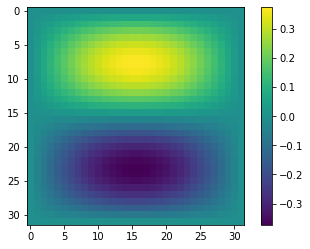

In [3]:
# test av oppgave 3

tol = 1.e-3
t0 = 0
tf = 0.02
h0 = 0.04 # initial step size in vssi
N = 32
k = 32 # k- rank approx

# def grid
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# def exact soln in t0
u_ex_0 = u_exact(X,Y,t0)
u_ex_f = u_exact(X,Y,tf)

#print(u_ex_0)

# Initialize u and u_dot
m,n = N,N
u0 = tilr.u_fun(g,m,n) 
u_dot = tilr.u_dot_fun(g,m,n)

# specify what method to use
method = tilr.second_order_method

# do method
Y,j = vssi.variable_solver(t0,tf,u0,tol,h0,method,k)

Yt = vssi.format_result(u_dot,Y)

plt.imshow(Yt[-1,:,])
plt.colorbar()


# Oppgave 4

In [4]:
t0 = 0
h = 0.1
tol = 1.e-3
k = 20
tf = 1

A = ex.A(0)
A_1 = ex.A(0.0125)
U,s,Vt = np.linalg.svd(A)
S = np.diag(s)
A_f = ex.A(tf)

method = dlr.second_order_method
Y,j = vssi.variable_solver(t0,tf,A,tol,h,method,k)
Yt = vssi.format_result(A,Y)


# Yt er en rank k approx av A og vil dermed ikke være like selv ved t0, men burde kansje være nærmere enn det den er nå

print(np.linalg.norm(Yt[0,:,:]-A)) 
print(np.linalg.norm(Yt[1,:,:] - A_1))
print(np.linalg.norm(Yt[-1,:,:]-A_f))


count 0 j 0 t 0 h 0.1 u 4.472 v 4.472 s 54.509 

count 1 j 0 t 0.0 h 0.05 u 4.472 v 4.472 s 54.509 

count 2 j 0 t 0.0 h 0.025 u 4.472 v 4.472 s 54.509 

count 3 j 0 t 0.0 h 0.0125 u 4.472 v 4.472 s 54.509 

count 4 j 0 t 0.0 h 0.00625 u 4.472 v 4.472 s 54.509 

count 0 j 1 t 0.00625 h 0.003125 u 4.472 v 4.472 s 54.68 

count 0 j 2 t 0.009375000000000001 h 0.003125 u 4.472 v 4.472 s 54.766 

count 0 j 3 t 0.0125 h 0.003125 u 4.472 v 4.472 s 54.852 

count 0 j 4 t 0.015625 h 0.003125 u 4.472 v 4.472 s 54.939 

count 0 j 5 t 0.01875 h 0.003125 u 4.472 v 4.472 s 55.026 

count 0 j 6 t 0.021875 h 0.003125 u 4.472 v 4.472 s 55.113 

count 0 j 7 t 0.024999999999999998 h 0.003125 u 4.472 v 4.472 s 55.201 

count 0 j 8 t 0.028124999999999997 h 0.003125 u 4.472 v 4.472 s 55.289 

count 0 j 9 t 0.031249999999999997 h 0.003125 u 4.472 v 4.472 s 55.377 

count 0 j 10 t 0.034374999999999996 h 0.003125 u 4.472 v 4.472 s 55.466 

count 0 j 11 t 0.0375 h 0.003125 u 4.472 v 4.472 s 55.555 

count 0 j 1

In [5]:
# t0 = 0
# h = 0.1
# tol = 1.e-5
# k = 100
# tf = 0.2

# A0 = ex.A(0.2)
# method = dlr.second_order_method

# Y,j = vssi.variable_solver(t0,tf,A0,tol,h,method,k)
# Yt = vssi.format_result(A0,Y)

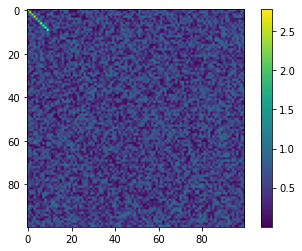

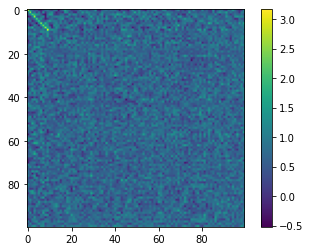

In [6]:
Aend = ex.A(0.2)
plt.imshow(Aend)
plt.colorbar()
plt.show()
plt.imshow(Yt[-1,:,:])
plt.colorbar()
plt.show()

# Oppgave 5

In [2]:
## Oppgave 5

t0 = 0
h = 5
tol = 1.e-1
k = 5
tf = 2

A_20 = ex.A_2(t0)
A_2f = ex.A_2(tf)

method = dlr.second_order_method
U_tensor,S_tensor,V_tensor,t_vals = vssi.variable_solver(t0,tf,A_20,tol,h,method,k)

Yt,Ut,St,Vt = vssi.format_Yt(A_20,U_tensor,S_tensor,V_tensor)

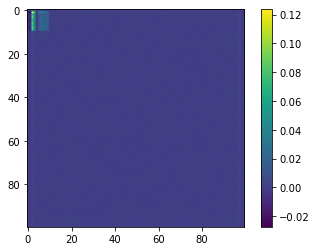

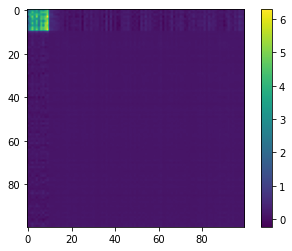

In [4]:
plt.imshow(A_2f)
plt.colorbar()
plt.show()

plt.imshow(Yt[-1])
plt.colorbar()

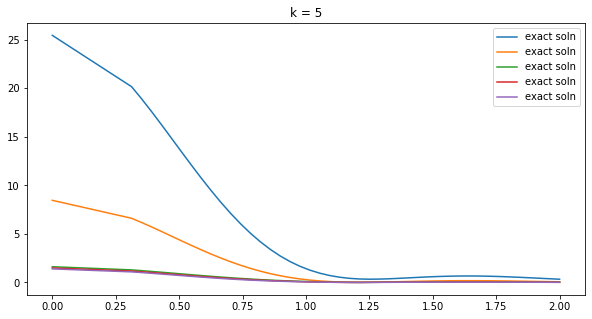

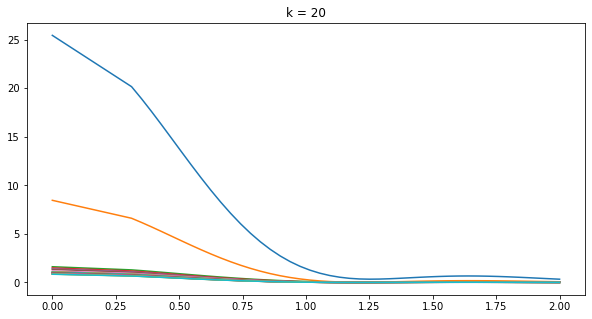

In [5]:
U,s,Vt = np.linalg.svd(A_20)

sing_vals = vssi.compute_singular_values(ex.A_2,5,t_vals)

plt.figure(1,figsize=(10,5))
plt.title("k = 5")
for vals in sing_vals: 
    plt.plot(t_vals,vals, label = "exact soln")
    plt.legend()
plt.show()



vssi.extract_singular_values(St)

sing_vals = vssi.compute_singular_values(ex.A_2,20,t_vals)

plt.figure(1,figsize=(10,5))
plt.title("k = 20")
for vals in sing_vals: 
    plt.plot(t_vals,vals)
plt.show()

